In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pencil as pc
from IPython.display import display, Math, Latex

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
# data = np.loadtxt('stratification.dat')

In [3]:
# plt.plot(data[:,0], data[:,1])
# plt.plot(data[:,0], data[:,2])
# plt.xlim(-0.9*np.pi, 0.1*np.pi)
# # plt.yscale('log')

In [4]:
#reading the grid
grid = pc.read.grid(trim=True, quiet=True)
z = grid.z

In [5]:
ts = pc.read.ts()

Read 284 lines.


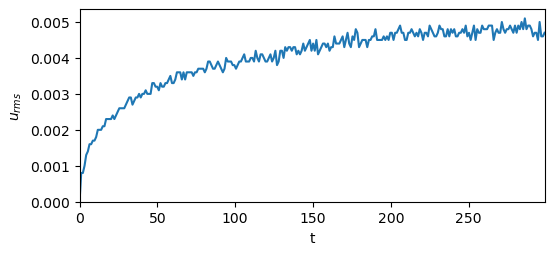

In [6]:
plt.figure(figsize=(6,2.5))
plt.plot(ts.t, ts.urms)
plt.xlim(ts.t[0], ts.t[-1])
plt.ylim(0, )
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [7]:
ts.urms[-1]

0.0047

In [8]:
# plt.figure(figsize=(6,2.5))
# plt.plot(ts.t, ts.brms)
# plt.xlim(ts.t[0], ts.t[-1])
# plt.yscale('log')
# plt.xlabel("t")
# plt.ylabel(r"$u_{rms}$")
# plt.show()

In [9]:
xya = pc.read.aver(plane_list="xy")
pre = xya.xy.ppmz
rho = xya.xy.rhomz
tem = xya.xy.TTmz

In [10]:
data = np.loadtxt('stratification.dat')

In [11]:
# cp

In [12]:
from scipy.integrate import trapezoid

In [13]:
# ss = trapezoid(data[:,2], data[:,0])*gamma/cp
# TT = np.exp(ss)

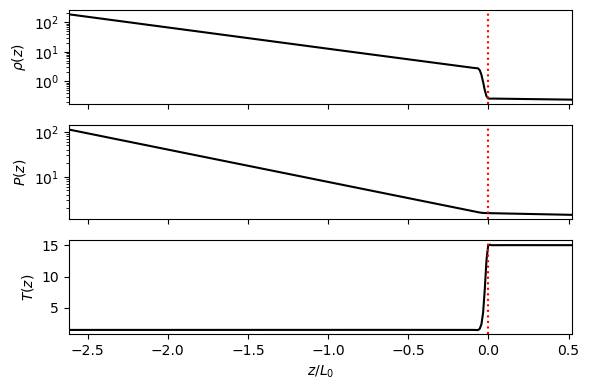

In [14]:
fig, axs = plt.subplots(3,1, figsize=(6,4), sharex=True)

axs[0].plot(z, rho[-1,:], color='k')
axs[1].plot(z, pre[-1,:], color='k')
axs[2].plot(z, tem[-1,:], color='k')
# axs[2].plot(z, data[:,2], color='r')
# axs[2].plot(z, np.exp(data[:,2]*gamma/cp), color='b')
# axs[2].plot(z, TT, color='b')
# axs[2].plot(z, tem[-200,:], color='k')
for i in range(0,3):
    axs[i].axvline(x=0, c='r', ls=':')

axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[1].set_xlim(z[0], z[-1])
axs[0].set_ylabel(r"$\rho(z)$")
axs[1].set_ylabel(r"$P(z)$")
axs[2].set_ylabel(r"$T(z)$")

plt.xlabel(r"$z/L_0$")
plt.tight_layout()
#plt.savefig("variation.jpg")

In [15]:
xyaver = pc.read.aver(plane_list='xy')

In [16]:
# plt.plot(z, xyaver.xy.bx2mz[-1])

In [17]:
yaver = pc.read.aver(plane_list='y')

In [18]:
uz_real = yaver.y.uzmxz

In [19]:
uz_real.shape

(5984, 1024, 300)

In [20]:
indx_t1 = np.argmin(np.abs(yaver.t - 150))  #to avoid the transient effects below t=40
# indx_t2 = np.argmin(np.abs(yaver.t - yaver.t[-1]))
indx_t2 = np.argmin(np.abs(yaver.t - 670))

In [21]:
np.shape(yaver.t)

(5984,)

In [22]:
# uz_fourier = mode.FT(uz_real[indx_t1:indx_t2,:,mode.indx_zref], 'ortho')

In [23]:
uz_fourier = np.fft.fftn(uz_real[indx_t1:indx_t2,:,225], s=None, axes=(-2, -1), norm='ortho')
uz_fourier.shape

(2983, 1024)

In [24]:
D = 0.17662
logP = np.log(np.abs(uz_fourier)/D**2)

In [25]:
size = np.shape(uz_real)
#size
nx = size[1]
nz = size[2]
nt = size[0]

tt = yaver.t
len(grid.x)

1024

In [26]:
param = pc.read.param()

In [27]:
lxyz = param.lxyz   #shape of the box
grz = -param.gravz  #value of g along z direction
gamma = param.gamma
cp = param.cp
lx = lxyz[0]
ly = lxyz[1]
lz = lxyz[2]
lz

3.1416

In [28]:
t_gd = tt[indx_t1:indx_t2]  #time interval where urms has reached a steady state
T = np.max(t_gd)-np.min(t_gd)
t_len = np.size(t_gd)

dkx = 2*np.pi/lx    #unit step along kx direction
dom = 2*np.pi/T #unit step alomg omega direction

In [29]:
if t_len%2 == 0:
    fom = np.arange(0, t_len/2)
    rom = -np.flip(np.arange(1, t_len/2+1))
    om = np.concatenate((fom, rom))*dom
else:
    fom = np.arange(0, t_len/2)
    rom = -np.flip(np.arange(1, t_len/2))
    om = np.concatenate((fom, rom))*dom

In [30]:
if nx%2 == 0:
    fnx = np.arange(0, nx/2)
    rnx = -np.flip(np.arange(1, nx/2+1))
    kx = np.concatenate((fnx, rnx))*dkx
else:
    fnx = np.arange(0, nx/2)
    rnx = -np.flip(np.arange(1, nx/2))
    kx = np.concatenate((fnx, rnx))*dkx

In [31]:
k_tilde = np.fft.fftshift(kx)#*L0
om_tilde = np.fft.fftshift(om)#/omega0
np.shape(om_tilde), np.shape(k_tilde), np.shape(logP)
# k_tilde

((2983,), (1024,), (2983, 1024))

In [32]:
k_tilde

array([-128.00000626, -127.75000625, -127.50000623, ...,  127.25000622,
        127.50000623,  127.75000625])

In [33]:
om_tilde

array([-62.83207556, -62.78993466, -62.74779376, ...,  62.74779376,
        62.78993466,  62.83207556])

In [34]:
cs_u = 3.154
cs_d = 1.008

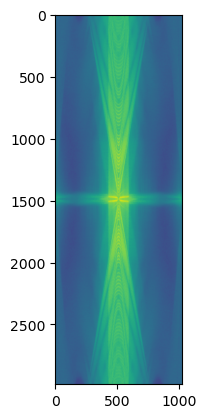

In [35]:
X, Y = np.meshgrid(k_tilde, om_tilde)
plt.imshow(np.fft.fftshift(logP), vmin=np.min(logP), vmax=np.max(logP))


In [36]:
P = np.load('pdata/P_om_z.npy')

Locator attempting to generate 3510 ticks ([-17.658, ..., 3.396000000000001]), which exceeds Locator.MAXTICKS (1000).


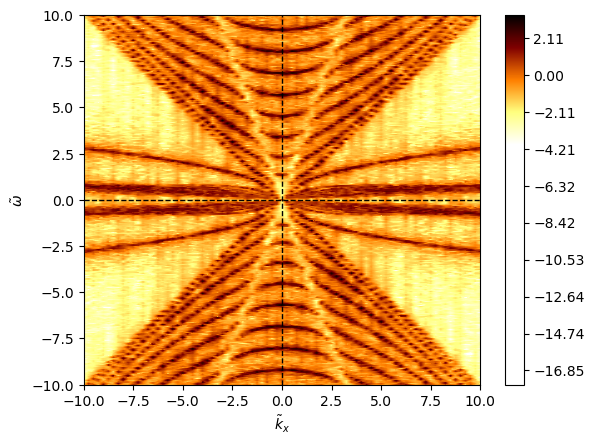

In [38]:
[X, Y] = np.meshgrid(k_tilde, om_tilde)

ii = 25
vmax = np.max(np.log(P[:,:,ii]))
plt.contourf(X, Y, np.log(P[:,:,ii]), 4000, cmap='afmhot_r', vmin=-4, vmax=vmax)

plt.axvline(x=0, c='k', ls='--', lw=1)
plt.axhline(y=0, c='k', ls='--', lw=1)
plt.xlim(-10,10)
plt.ylim(-10,10)
# plt.ylim(-np.pi,np.pi)
#plt.ylim(0,10)
plt.colorbar()
plt.xlabel(r"$\tilde{k}_x$")
plt.ylabel(r"$\tilde{\omega}$")
# plt.savefig('plots/k_om4.png')
plt.show()

In [ ]:
# [X, Y] = np.meshgrid(k_tilde, om_tilde)
# #plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# # plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=np.min(logP), vmax=np.max(logP))
# # plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=-6, vmax=np.max(logP))
# # plt.contourf(X, Y, np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=np.min(logP), vmax=np.max(logP))
# plt.contourf(X, Y, np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=-4, vmax=np.max(logP))
# # plt.plot(aa, np.sqrt(grz*aa), ls='dashdot', c='k')
# # plt.plot(k_tilde, cs_d*k_tilde, ls='-', c='k')
# # plt.plot(k_tilde, cs_u*k_tilde, ls=':', c='k')
# plt.axvline(x=0, c='k', ls='--', lw=1)
# plt.axhline(y=0, c='k', ls='--', lw=1)
# plt.xlim(-2*np.pi,2*np.pi)
# # plt.ylim(-np.pi,np.pi)
# #plt.ylim(0,10)
# plt.colorbar()
# plt.xlabel(r"$\tilde{k}_x$")
# plt.ylabel(r"$\tilde{\omega}$")
# # plt.savefig('plots/k_om4.png')
# plt.show()

In [ ]:
def pmodes(kx, n: int):
        """
        Calculate the freq of p-mode.
        n: order of p-modes, 0, 1, 2, 3, ...
        """
        gz = 1
        L0 = 1
        omega0 = 1
        om_sq = gz**2/(2*cs_d)**2+cs_d**2*((kx/L0)**2+((n+0.5)*np.pi/(9*lz/10))**2)
        freq = np.sqrt(om_sq/omega0**2)
        return np.round(freq, 3)

In [ ]:
gz = 1
L0 = 1
omega0 = 1

In [ ]:
# k_tilde[0:512]
# k_tilde[512:-1]

In [ ]:
# [X, Y] = np.meshgrid(k_tilde, om_tilde)
# #plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# # plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=np.min(logP), vmax=np.max(logP))
# plt.contourf(X, Y, np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=-6, vmax=np.max(logP))
# # plt.plot(aa, np.sqrt(grz*aa), ls='dashdot', c='k')
# # plt.plot(k_tilde, cs_d*k_tilde, ls='-', c='k')
# # plt.plot(k_tilde, cs_u*k_tilde, ls=':', c='k')

# plt.plot(k_tilde, cs_d*k_tilde/(omega0*L0), ls='-', c='k', lw=1)
# plt.plot(k_tilde, cs_u*k_tilde/(omega0*L0), ls='--', c='k', lw=1)
# plt.plot(k_tilde[512:-1], np.sqrt(gz*k_tilde[512:-1]/(omega0*L0)), ls='-.', c='w')
# q = 0.106
# plt.plot(k_tilde[512:-1], np.sqrt(gz*k_tilde[512:-1]*((1-q)/(1+q))/(omega0*L0)), ls=(0, (3, 1, 1, 1)), c='w')
# for i in range(0, 16):
#     plt.plot(k_tilde, pmodes(k_tilde, i), c='w', ls=':')
#     plt.plot(k_tilde, -pmodes(k_tilde, i), c='w', ls=':')

# # plt.axvline(x=0, c='k', ls='--', lw=1)
# # plt.axhline(y=0, c='k', ls='--', lw=1)
# plt.xlim(-2*np.pi,2*np.pi)
# plt.ylim(-2*np.pi,2*np.pi)
# #plt.ylim(0,10)
# plt.colorbar()
# plt.xlabel(r"$\tilde{k}_x$")
# plt.ylabel(r"$\tilde{\omega}$")
# # plt.savefig('plots/k_om2.png')
# plt.show()

In [ ]:
# np.savetxt('pdata/k_om.dat', np.fft.fftshift(logP))

In [ ]:
indx_k = np.argmin(np.abs(k_tilde - 2))
k_tilde[indx_k]

2.0

In [ ]:
uz_fourier = np.fft.fftshift(uz_fourier)

In [ ]:
P_k = np.abs(uz_fourier[:,indx_k])#/D**2)

In [ ]:
# om_tilde[:]

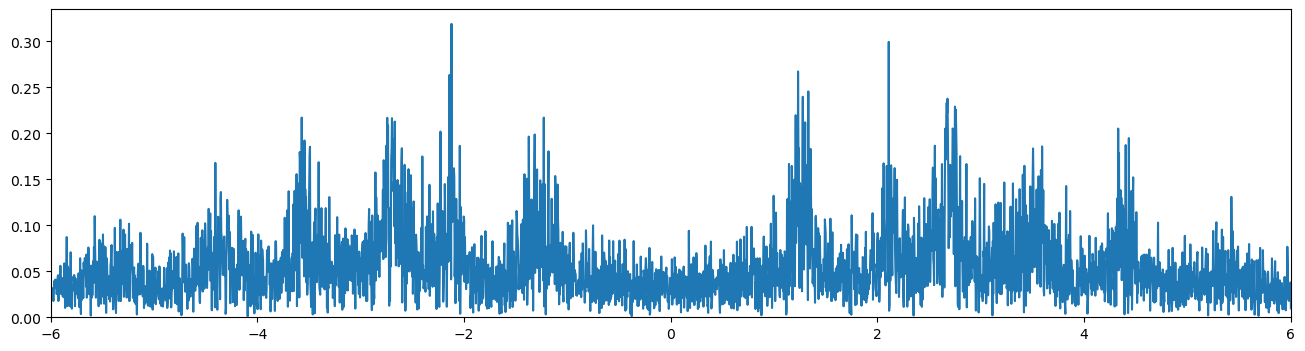

In [ ]:
fig = plt.figure(figsize=(16,4))
# for i in range(len(kz)):
#     plt.axvline(x = kz[i], color = 'b')

plt.plot(om_tilde[:], P_k[:])    # NOTE:Phere we have used the fftshift to 
plt.ylim(0,)                                                                         #Shift the zero-frequency component to the center of the spectrum
plt.xlim(-6, 6)

plt.show()

In [ ]:
P = np.exp(logP)
P_k_prime = np.fft.fftshift(P)[:,indx_k]#/D**2)

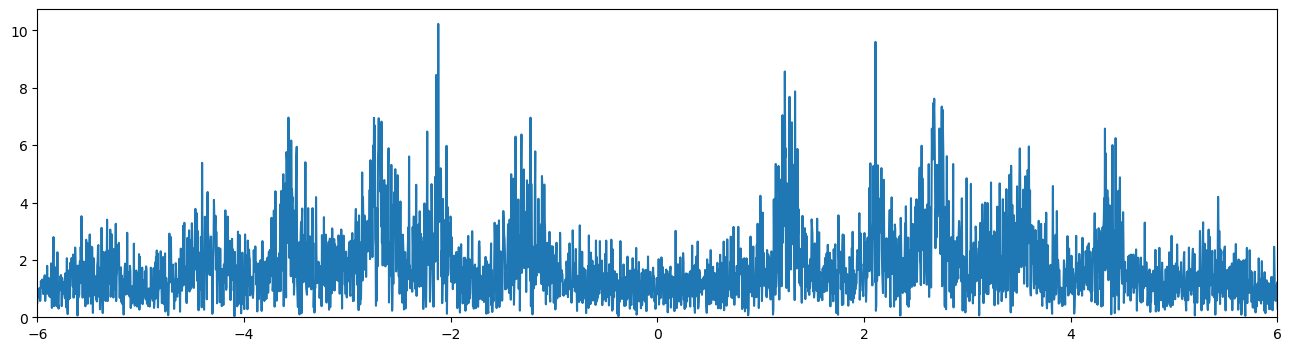

In [ ]:
fig = plt.figure(figsize=(16,4))
# for i in range(len(kz)):
#     plt.axvline(x = kz[i], color = 'b')

plt.plot(om_tilde[:], P_k_prime[:])    # NOTE:Phere we have used the fftshift to 
plt.ylim(0,)                                                                         #Shift the zero-frequency component to the center of the spectrum
plt.xlim(-6, 6)

plt.show()

In [ ]:
uz_xz = yaver.y.uzmxz[indx_t1:indx_t2,:]
u_dim = uz_xz.shape

In [ ]:
u_dim

(4118, 1024, 256)

In [ ]:
# np.diff(uz_f_z[:,:,114]-uz_fourier)

In [ ]:
uz_fourier = np.fft.fftn(uz_real[indx_t1:indx_t2,:,228], s=None, axes=(-2, -1), norm='ortho')

In [ ]:
# indx_z = np.arange(0, 256, 2)
# indx_z = np.linspace(z[0], z[-1], u_dim[2])
indx_z = np.linspace(z[0], z[-1], 128)
# uz_f_z =  np.empty([np.shape(uz_xz[:,0,1])[0], np.shape(uz_xz[:,0,1])[1], len(indx_z)], dtype=complex)
uz_f_z =  np.empty([u_dim[0], u_dim[1], len(indx_z)], dtype=complex)


for i in range(len(indx_z)):
    # exec(f'uz_fourier_{i} = np.fft.fftn(uz_xz[indx_t1:indx_t2,:,indx_z[{i}]], s=None, axes=(-2, -1), norm=None)')
    # exec(f'uz_fourier_kin{i} = np.fft.fftn(uz_xz[:,0,{i}], s=None, axes=(-2, -1), norm=None)')
    uz_f_z[:,:,i] = np.fft.fftn(uz_xz[:,:,i], s=None, axes=(0, 1), norm='ortho')

In [ ]:
# logP_z = np.fft.fftshift(np.log(np.abs(uz_f_z/D**2)), axes=(-2,-1))
logP_z = np.fft.fftshift(np.log(np.abs(uz_f_z/D**2)), axes=(0))
logP_z = np.fft.fftshift(logP_z, axes=(1))

/tmp/ipykernel_1917681/947804533.py:2: RuntimeWarning:

divide by zero encountered in log



In [ ]:
np.argmin(np.abs(indx_z-0))

114

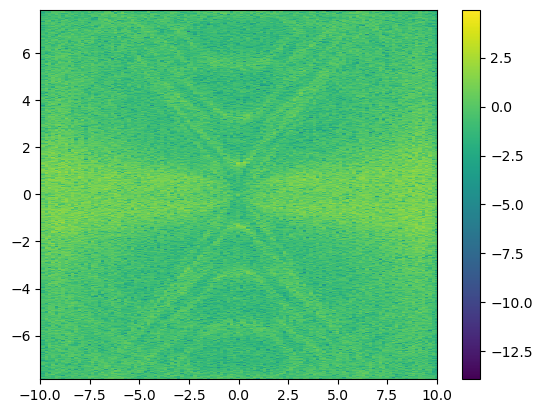

In [ ]:
[X, Y] = np.meshgrid(k_tilde, om_tilde)
# plt.imshow(logP_z[:,:,114])
plt.pcolor(X, Y, logP_z[:,:,115])
# plt.imshow(np.fft.fftshift(logP))
plt.xlim(-10,10)
# plt.ylim(0,100)
plt.colorbar()

Locator attempting to generate 3355 ticks ([-15.228, ..., 4.895999999999999]), which exceeds Locator.MAXTICKS (1000).


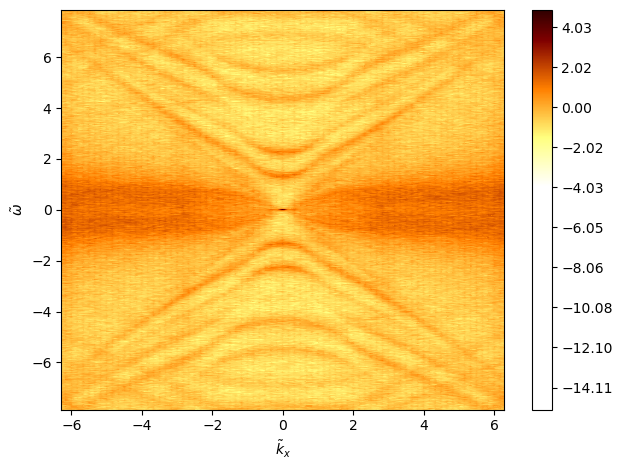

In [ ]:
# [X, Y] = np.meshgrid(k_tilde, om_tilde)
# #plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))

# plt.contourf(X, Y, logP_z[:,:,80], 4000, cmap='afmhot_r', vmin=-4, vmax=np.max(logP))
# # plt.contourf(logP_z[200:,:,114], 4000, cmap='afmhot_r')
# # plt.contourf(logP_z[:,:,124], 4000, cmap='afmhot_r', vmin=-4, vmax=np.max(logP))
# # plt.plot(aa, np.sqrt(grz*aa), ls='dashdot', c='k')

# # plt.plot(k_tilde, cs_d*k_tilde/(omega0*L0), ls='-', c='k')
# # plt.plot(k_tilde, cs_u*k_tilde/(omega0*L0), ls='--', c='k')
# # plt.plot(k_tilde, np.sqrt(gz*k_tilde/(omega0*L0)), ls='-.', c='w')
# # plt.plot(k_tilde, np.sqrt(gz*k_tilde*((1-q)/(1+q))/(omega0*L0)), ls=(0, (3, 1, 1, 1)), c='w')
# # for i in range(0, 16):
# #     plt.plot(k_tilde, pmodes(k_tilde, i), c='w', ls=':')

# # plt.axvline(x=2, c='k')
# # plt.xlim(0,16)
# # plt.ylim(0,np.max(logP_z))
# # plt.ylim(0,np.max(om_til))
# # plt.xlim(0,10)
# # plt.ylim(0,np.max(om_tilde))
# plt.xlim(-2*np.pi,2*np.pi)
# plt.colorbar()
# plt.xlabel(r"$\tilde{k}_x$")
# plt.ylabel(r"$\tilde{\omega}$")
# plt.tight_layout()
# plt.savefig('plots/k_om_80.png')
# plt.show()

In [ ]:
P_z = np.exp(logP_z)
P_z_k114 = P_z[:,np.argmin(np.abs(k_tilde-4)),114]

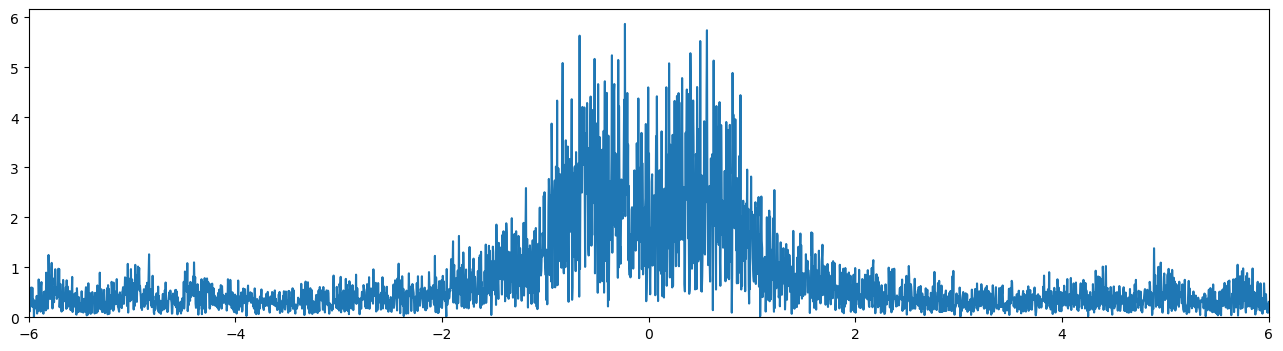

In [ ]:
fig = plt.figure(figsize=(16,4))
# for i in range(len(kz)):
#     plt.axvline(x = kz[i], color = 'b')

plt.plot(om_tilde[:], P_z_k114)    # NOTE:Phere we have used the fftshift to 
plt.ylim(0,)                                                                         #Shift the zero-frequency component to the center of the spectrum
plt.xlim(-6, 6)

plt.show()

In [ ]:
np.diff(t_gd)

array([0.40007687, 0.40025997, 0.3996153 , ..., 0.40026855, 0.39978027,
       0.4005127 ], dtype=float32)